In [106]:
# Model Steps:

# 1-Training Data
# 2-Preprocessing
# 3-Arch.
# 4-Fine Tune, Pre-trained mode
# 5-Optimize Hyperparameters
# 6-Evalutaion
# 7-Deploy

In [141]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import applications

In [142]:
train='D:/Final/Graduation project/datasets/casting_data/casting_data/train'
test='D:/Final/Graduation project/datasets/casting_data/casting_data/test'

In [143]:
trdata = ImageDataGenerator(
    	rescale = 1 / 255.0,
        rotation_range = 20,
        zoom_range = 0.05,
        width_shift_range = 0.05,
        height_shift_range = 0.05,
        shear_range = 0.05,
        horizontal_flip = True,
        fill_mode = "nearest",
        validation_split = 0.20)

traindata = trdata.flow_from_directory(directory=train ,batch_size=32 ,
                                       target_size=(224,224), subset='training',
                                       shuffle=True,color_mode='rgb',class_mode='categorical')..repeat()

valid_generator = trdata.flow_from_directory(
    directory=train,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32 ,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
).repeat()

tsdata = ImageDataGenerator(rescale= 1/255.0)
testdata = tsdata.flow_from_directory(directory=test, target_size=(224,224),color_mode='rgb',
                                      batch_size=1,class_mode=None,shuffle=False)



#validation_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
#valid_generator = valid_generator.batch(3).repeat()


# to produce a batches enough for trainning req 


Found 6230 images belonging to 2 classes.
Found 1557 images belonging to 2 classes.
Found 240 images belonging to 1 classes.


In [144]:
VGG = keras.applications.vgg16.VGG16(input_shape=(224,224,3), include_top = False, weights='imagenet')

In [145]:
VGG.trainable = False
#Not train the front 13 layers, train only last two layers

In [146]:
model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dense(units=256, activation="relu"),
    keras.layers.Dense(units=2, activation="softmax"), 
])

In [147]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [148]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_21 (Dense)            (None, 256)               6422784   
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 2)                 514       
                                                                 
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [151]:
hist = model.fit(traindata , steps_per_epoch = 195   , epochs = 5 , #traindata.n 
                           validation_data = valid_generator, validation_steps = 48)
model.save('vggclf_v5.h5')


# Your input ran out of data; interrupting training. Make sure that your 
#dataset or generator can generate at least `steps_per_epoch * epochs` batches 
# image data generator should generate at least 195*10 = 1950 so if i set batch size to 32 so i need a 
# 6230 / 32 = 195 batch to go through entire data set  

Epoch 1/10
19/19 [==============================] - 163s 9s/step - loss: 0.0880 - accuracy: 0.9753 - val_loss: 0.1521 - val_accuracy: 0.9375
Epoch 2/10
19/19 [==============================] - 174s 9s/step - loss: 0.1237 - accuracy: 0.9589 - val_loss: 0.4507 - val_accuracy: 0.8438
Epoch 3/10
19/19 [==============================] - 189s 10s/step - loss: 0.1018 - accuracy: 0.9572 - val_loss: 0.0721 - val_accuracy: 0.9688
Epoch 4/10
19/19 [==============================] - 193s 10s/step - loss: 0.1084 - accuracy: 0.9638 - val_loss: 0.0495 - val_accuracy: 0.9844
Epoch 5/10
19/19 [==============================] - 169s 9s/step - loss: 0.0933 - accuracy: 0.9688 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 167s 9s/step - loss: 0.0562 - accuracy: 0.9885 - val_loss: 0.0283 - val_accuracy: 0.9922
Epoch 7/10
19/19 [==============================] - 167s 9s/step - loss: 0.0907 - accuracy: 0.9770 - val_loss: 0.1041 - val_accuracy: 0.9688
Epoch 8/10


In [156]:
model.evaluate(valid_generator,steps=48)

48/48 [==============================] - 340s 7s/step - loss: 0.0378 - accuracy: 0.9909


[0.03780967742204666, 0.9908854365348816]

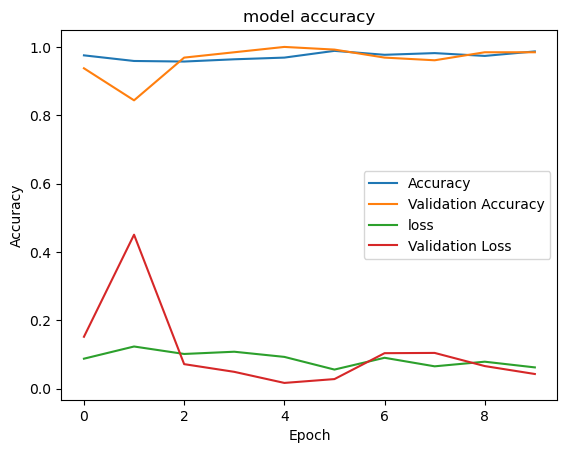

In [153]:

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


In [118]:
pred = model.predict(testdata,steps = testdata.n, verbose = 1)

pred

240/240 [==============================] - 78s 324ms/step


array([[1.00000000e+00, 2.30276891e-11],
       [1.00000000e+00, 4.80766094e-09],
       [9.99989033e-01, 1.09874181e-05],
       [9.99998689e-01, 1.28158774e-06],
       [1.00000000e+00, 4.68995814e-11],
       [1.00000000e+00, 3.55644958e-11],
       [9.99697328e-01, 3.02654109e-04],
       [1.00000000e+00, 5.17542063e-08],
       [9.99966264e-01, 3.37285383e-05],
       [1.00000000e+00, 4.13268898e-11],
       [9.99999881e-01, 1.03371136e-07],
       [9.74764168e-01, 2.52358429e-02],
       [1.00000000e+00, 1.03480975e-08],
       [1.00000000e+00, 4.26450888e-11],
       [1.00000000e+00, 1.97448031e-08],
       [9.99999285e-01, 7.47622380e-07],
       [9.99966979e-01, 3.29961040e-05],
       [1.00000000e+00, 9.13933373e-11],
       [9.99998689e-01, 1.36195376e-06],
       [1.00000000e+00, 4.69834553e-08],
       [9.99999881e-01, 7.03977250e-08],
       [1.00000000e+00, 2.31745352e-12],
       [1.00000000e+00, 1.00233454e-13],
       [1.00000000e+00, 3.91867978e-08],
       [9.999994

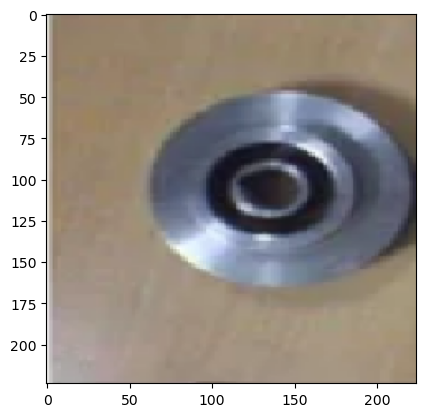

In [154]:
from keras.preprocessing import image
img = keras.utils.load_img("D:/Final/Graduation project/datasets/12.png",target_size=(224,224))
img = np.asarray(img)


plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [155]:
from keras.models import load_model
saved_model = load_model("vggclf_v5.h5")
output = model.predict(img)
if output[0][0] > output[0][1]:
    print("defected")
    print(output)
else:
    print("good")
    print(output)

1/1 [==============================] - 3s 3s/step
good
[[0. 1.]]


In [121]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)
model_from_pickle = pickle.loads(saved_model)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\functional
......vars
...layers\functional\layers\conv2d
......vars
.........0
.........1
...layers\functional\layers\conv2d_1
......vars
.........0
.........1
...layers\functional\layers\conv2d_10
......vars
.........0
.........1
...layers\functional\layers\conv2d_11
......vars
.........0
.........1
...layers\functional\layers\conv2d_12
......vars
.........0
.........1
...layers\functional\layers\conv2d_2
......vars
.........0
.........1
...layers\functional\layers\conv2d_3
......vars
.........0
.........1
...layers\functional\layers\conv2d_4
......vars
.........0
.........1
...layers\functional\layers\conv2d_5
......vars
.........0
.........1
...layers\functional\layers\conv2d_6
......vars
.........0
.........1
...layers\functional\